In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from sklearn import datasets,model_selection,linear_model,metrics

data = datasets.load_diabetes()
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
diabetes = data.data
print(type(diabetes))
features_name = data.feature_names
dfDia = pd.DataFrame(diabetes,columns=features_name)
dfDia.head()

<class 'numpy.ndarray'>


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
cor = dfDia.corr()
print(cor)

          age       sex       bmi        bp  ...        s3        s4        s5        s6
age  1.000000  0.173737  0.185085  0.335428  ... -0.075181  0.203841  0.270774  0.301731
sex  0.173737  1.000000  0.088161  0.241010  ... -0.379090  0.332115  0.149916  0.208133
bmi  0.185085  0.088161  1.000000  0.395411  ... -0.366811  0.413807  0.446157  0.388680
bp   0.335428  0.241010  0.395411  1.000000  ... -0.178762  0.257650  0.393480  0.390430
s1   0.260061  0.035277  0.249777  0.242464  ...  0.051519  0.542207  0.515503  0.325717
s2   0.219243  0.142637  0.261170  0.185548  ... -0.196455  0.659817  0.318357  0.290600
s3  -0.075181 -0.379090 -0.366811 -0.178762  ...  1.000000 -0.738493 -0.398577 -0.273697
s4   0.203841  0.332115  0.413807  0.257650  ... -0.738493  1.000000  0.617859  0.417212
s5   0.270774  0.149916  0.446157  0.393480  ... -0.398577  0.617859  1.000000  0.464669
s6   0.301731  0.208133  0.388680  0.390430  ... -0.273697  0.417212  0.464669  1.000000

[10 rows x 10 column

<Axes: >

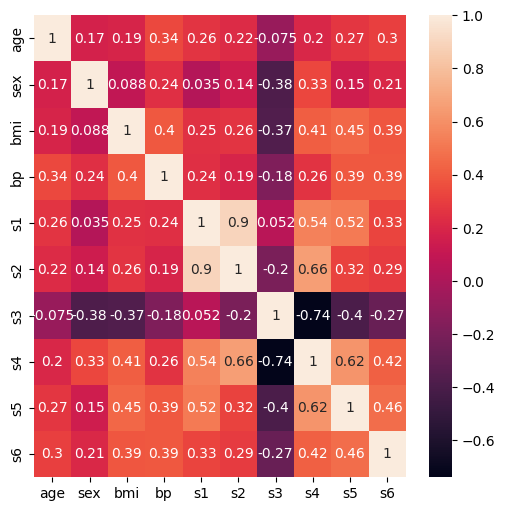

In [ ]:
import seaborn as sns

plt.figure(1,(6,6))
sns.heatmap(cor,annot=True)

<Figure size 640x480 with 0 Axes>

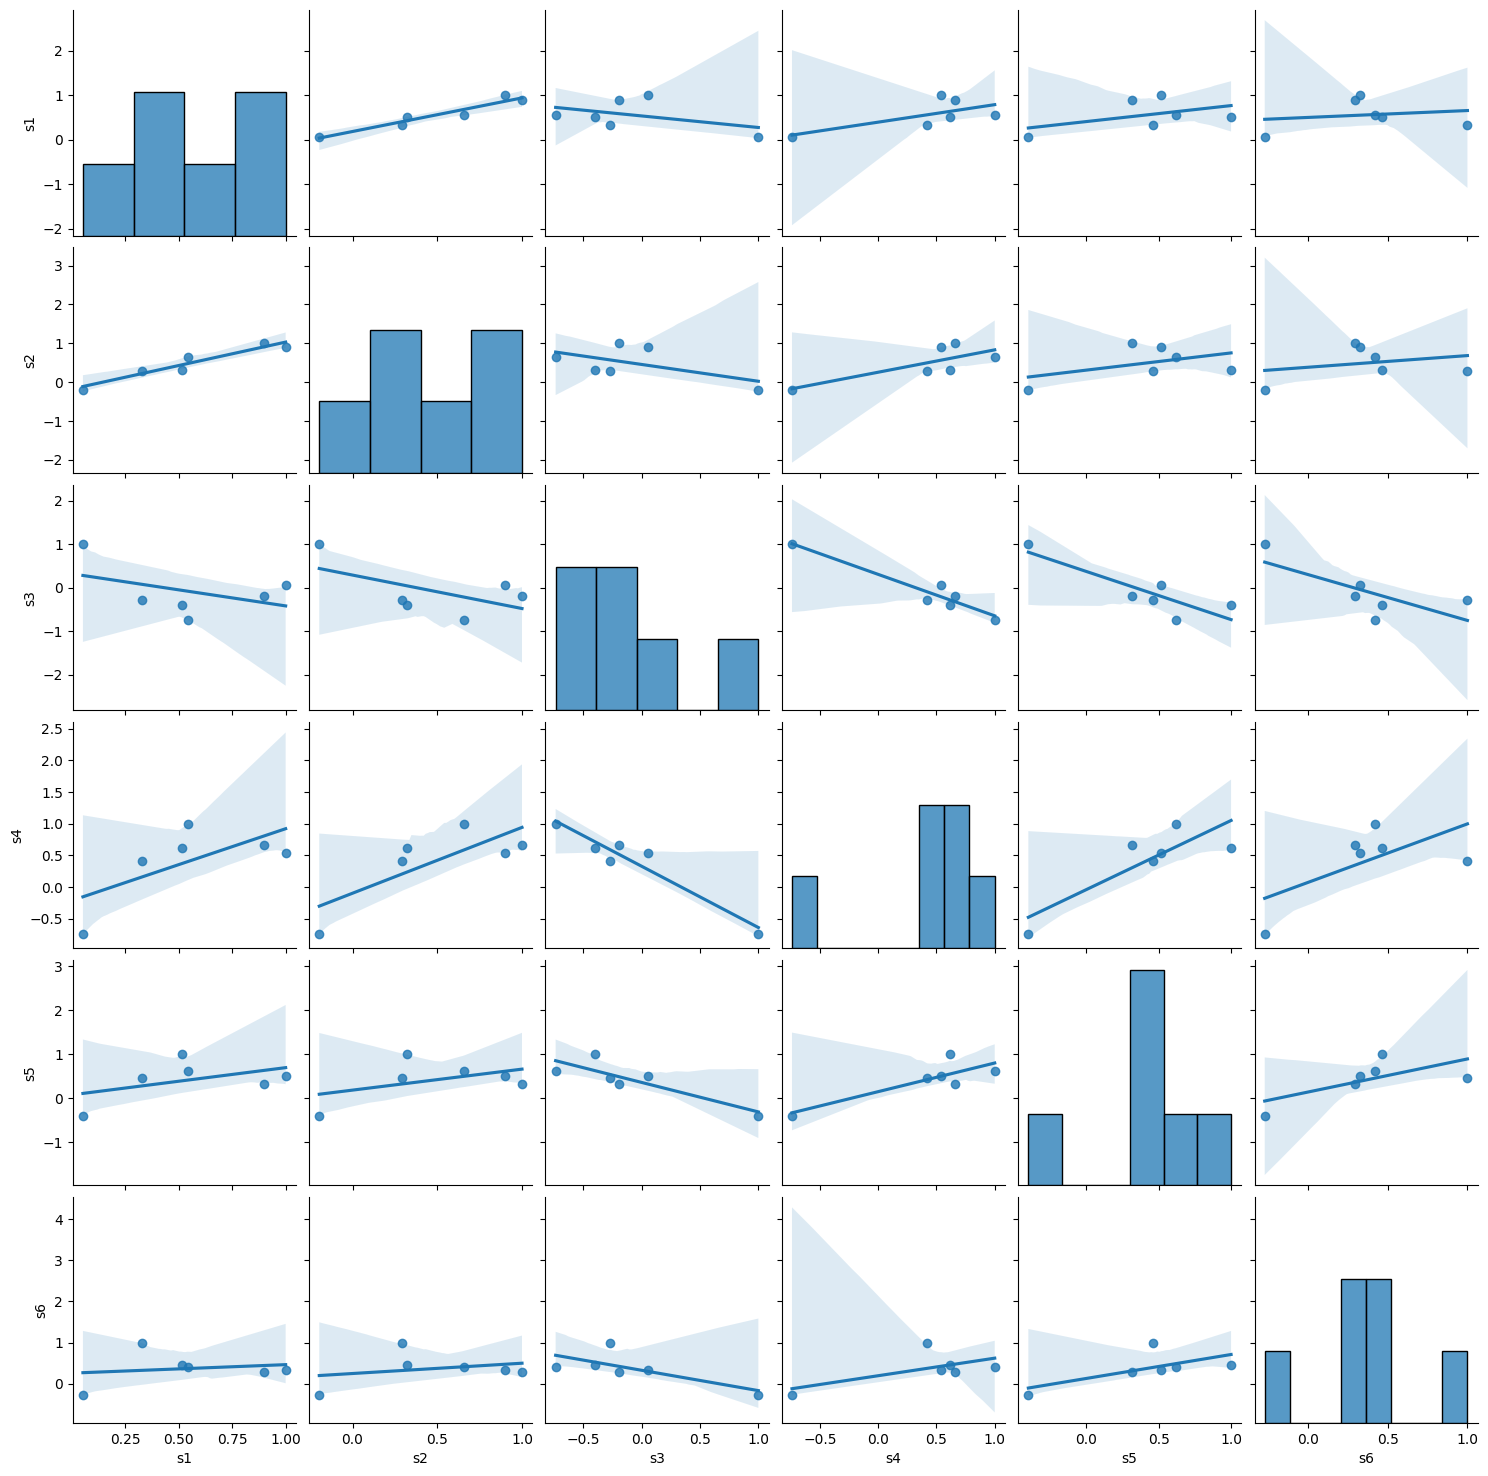

In [ ]:
newData = dfDia.drop(['age', 'sex', 'bmi', 'bp'],axis=1,inplace=False)
corNew = newData.corr()
plt.figure(1)
sns.pairplot(corNew,kind ='reg')


In [ ]:
# now create the linear model
# where BMI is the dependent variable and s5 as the independent variable
X = dfDia['s5'].values # independent variable
y = dfDia['bmi'].values # dependent variable
# if single independent variable is concidered
X = X.reshape(-1,1)
# spliting the dta intpo train and test
[Xtrain,Xtest,ytrain,ytest]=model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(309, 1) (309,)
(133, 1) (133,)


In [ ]:
# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(Xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(Xtrain)
# predict the xtest data
ypredTst = lnModel.predict(Xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

Training r2 value: 0.18234279903420703
Testing r2 value: 0.2318301453358258


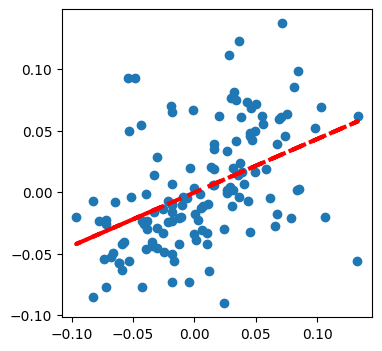

In [ ]:
plt.figure(1,(4,4))
plt.scatter(Xtest,ytest)
plt.plot(Xtest,ypredTst,'--r',linewidth=3)

In [ ]:
# now create the linear model
# where s1 is the dependent variable and s2 as the independent variable
X = dfDia['s1'].values # independent variable
y = dfDia['s2'].values # dependent variable
# if single independent variable is concidered
X = X.reshape(-1,1)
# spliting the dta intpo train and test
[Xtrain,Xtest,ytrain,ytest]=model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(309, 1) (309,)
(133, 1) (133,)


In [ ]:
# normal linear regressuion
# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(Xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(Xtrain)
# predict the xtest data
ypredTst = lnModel.predict(Xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

Training r2 value: 0.7795103022549408
Testing r2 value: 0.8469928504733052


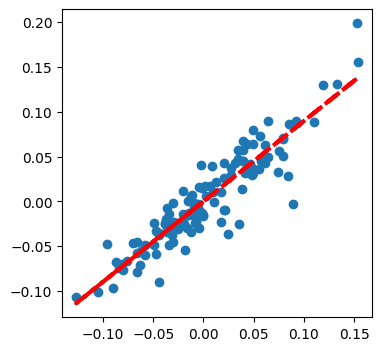

In [ ]:
plt.figure(1,(4,4))
plt.scatter(Xtest,ytest)
plt.plot(Xtest,ypredTst,'--r',linewidth=3)

In [ ]:
newdata = datasets.fetch_california_housing()
print(newdata.feature_names)
print(newdata.DESCR)
print(newdata.target.shape)
print(newdata.target)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for Califo

               MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  MedHouseVal
MedInc       1.000000 -0.119034  0.326895  -0.062040  ...  0.018766 -0.079809  -0.015176     0.688075
HouseAge    -0.119034  1.000000 -0.153277  -0.077747  ...  0.013191  0.011173  -0.108197     0.105623
AveRooms     0.326895 -0.153277  1.000000   0.847621  ... -0.004852  0.106389  -0.027540     0.151948
AveBedrms   -0.062040 -0.077747  0.847621   1.000000  ... -0.006181  0.069721   0.013344    -0.046701
Population   0.004834 -0.296244 -0.072213  -0.066197  ...  0.069863 -0.108785   0.099773    -0.024650
AveOccup     0.018766  0.013191 -0.004852  -0.006181  ...  1.000000  0.002366   0.002476    -0.023737
Latitude    -0.079809  0.011173  0.106389   0.069721  ...  0.002366  1.000000  -0.924664    -0.144160
Longitude   -0.015176 -0.108197 -0.027540   0.013344  ...  0.002476 -0.924664   1.000000    -0.045967
MedHouseVal  0.688075  0.105623  0.151948  -0.046701  ... -0.023737 -0.144160  -0.

<Axes: >

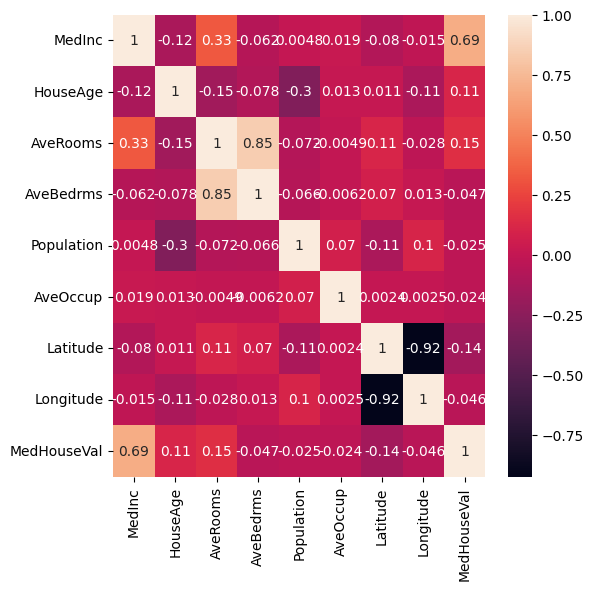

In [ ]:
newHousing = pd.DataFrame(newdata.data,columns=features_name)
newHousing['MedHouseVal'] = newdata.target
features_name = newdata.feature_names
corrNew = newHousing.corr()
print(corrNew)
plt.figure(2,(6,6))
sns.heatmap(corrNew,annot=True)

In [ ]:
X = newHousing['MedInc'].values # independent variable
y = newHousing['MedHouseVal'].values # dependent variable
# if single independent variable is considered
X = X.reshape(-1,1)
[Xtrain,Xtest,ytrain,ytest]=model_selection.train_test_split(X,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(14448, 1) (14448,)
(6192, 1) (6192,)


In [ ]:
# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(Xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(Xtrain)
# predict the xtest data
ypredTst = lnModel.predict(Xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

Training r2 value: 0.4684474534190508
Testing r2 value: 0.48448851967708917


In [ ]:
# multiple linear regression
#now create the linear model
# where BMI is the dependent variable and s5 as the independent variable
X = newHousing[['MedInc', 'HouseAge', 'AveRooms',
                'AveBedrms', 'Population','Latitude', 'Longitude']].values # independent variable
y = newHousing['MedHouseVal'].values # dependent variable

# if single independent variable is considered
#X = X.reshape(-1,1)
# split the data into train and test
ratio= 0.3
[Xtrain,Xtest,ytrain,ytest] = model_selection.train_test_split(
    X,y,test_size=ratio,random_state=5
)

print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(Xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(Xtrain)
# predict the xtest data
ypredTst = lnModel.predict(Xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

(14448, 7) (14448,)
(6192, 7) (6192,)
Training r2 value: 0.602522036664994
Testing r2 value: 0.6103606181626167


In [ ]:
newHousing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')